# Assignment 3

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [143]:
X_test_real = pd.read_csv("X_test.csv")
df = pd.read_csv("train.csv")

## Data Wrangling

In [144]:
df['tempo'] = df['tempo'].replace('?', np.nan)
df['tempo'] = df['tempo'].astype('float64')

In [145]:
df['duration_ms'] = df['duration_ms'].replace(-1,np.nan)

In [146]:
df['time_signature'] = df['time_signature'].replace({'1-Apr': '1/4',
     '3-Apr': '3/4', '4-Apr': '4/4', '5-Apr': '5/4'})

In [147]:
df = df.drop(['instance_id','track_name','track_id'], axis=1)


## EDA

In [148]:
df.shape

(50000, 16)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       50000 non-null  object 
 1   popularity        50000 non-null  int64  
 2   acousticness      50000 non-null  float64
 3   danceability      50000 non-null  float64
 4   duration_ms       39978 non-null  float64
 5   energy            50000 non-null  float64
 6   instrumentalness  50000 non-null  float64
 7   key               50000 non-null  object 
 8   liveness          50000 non-null  float64
 9   loudness          50000 non-null  float64
 10  mode              50000 non-null  object 
 11  speechiness       50000 non-null  float64
 12  tempo             42539 non-null  float64
 13  time_signature    50000 non-null  object 
 14  valence           50000 non-null  float64
 15  genre             50000 non-null  object 
dtypes: float64(10), int64(1), object(5)
memo

In [150]:
print("Number of instances: ", df.shape[0])

Number of instances:  50000


In [151]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['genre'] = label_encoder.fit_transform(df['genre'])

In [152]:
X = df.drop('genre', axis=1)
y = df['genre']

In [153]:
print("Number of features: ", len(X.columns))

Number of features:  15


In [154]:
category_features = X.select_dtypes(include=["category", "object"])
print("Category features: ", category_features.columns.to_list())
print("Number of category features: ", len(category_features.columns))

Category features:  ['artist_name', 'key', 'mode', 'time_signature']
Number of category features:  4


In [155]:
numeric_features = X.select_dtypes(include=np.number)
print("Numberic features: ", numeric_features.columns.to_list())
print("Number of numeric features: ", len(numeric_features.columns))

Numberic features:  ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
Number of numeric features:  11


In [156]:
# Check for missing values
missing_values = df.isnull().sum()

# Calculate the percentage of missing values for each feature
missing_percent = (missing_values / len(df)) * 100

# Filter features with missing values
features_with_missing = missing_percent[missing_percent > 0]

# Print the summary
if features_with_missing.empty:
    print("No missing values in the data.")
else:
    print("Number of features that have missing values:", len(features_with_missing))
    for feature, percent in features_with_missing.items():
        print(f"{feature}: {percent:.2f}% missing")

Number of features that have missing values: 2
duration_ms: 20.04% missing
tempo: 14.92% missing


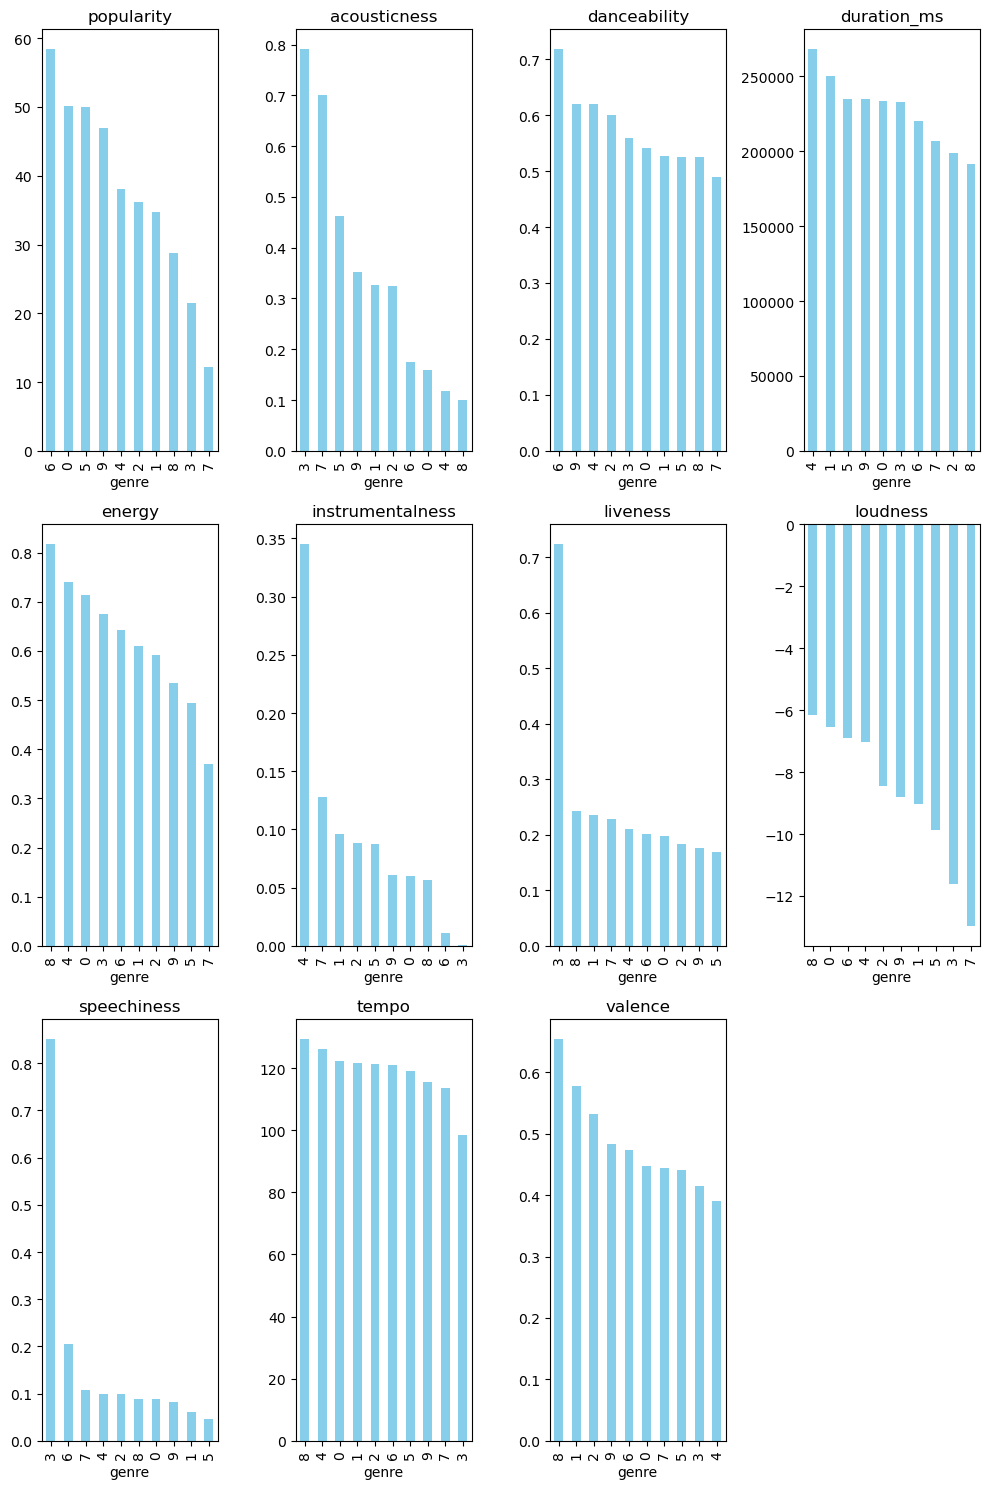

In [157]:
import matplotlib.pyplot as plt
import pandas as pd

mean_by_genre = pd.DataFrame(df.groupby('genre').mean()).reset_index()

# List of features to plot
features = mean_by_genre.columns[1:]  # Exclude the 'genre' column

# Create a grid of subplots
num_rows = 3
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10,15))
fig.subplots_adjust(wspace=0.6, hspace=0.5)

# Iterate through features and create bar charts
for i, feature in enumerate(features):
    row, col = i // num_cols, i % num_cols
    if row < num_rows and col < num_cols:
        ax = axes[row, col]

        # Sort the DataFrame by the current feature in descending order
        mean_by_genre_sorted = mean_by_genre.sort_values(by=feature, ascending=False)

        # Plot the sorted DataFrame
        mean_by_genre_sorted.plot(kind='bar', x='genre', y=feature, ax=ax, legend=False, color='skyblue')
        ax.set_title(feature)
        

# Add spacing between subplots

axes[-1, -1].axis('off')
plt.tight_layout()
plt.show()


### Correlations

In [158]:
# Create a correlation matrix
corr_metrics = numeric_features.corr()
corr_metrics.style.background_gradient()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.372796,0.128683,0.079823,0.150871,-0.068177,-0.243377,0.319603,-0.254632,0.063108,-0.091996
acousticness,-0.372796,1.000000,-0.105855,-0.054116,-0.601454,0.003627,0.249236,-0.612320,0.375212,-0.231702,-0.150105
danceability,0.128683,-0.105855,1.000000,-0.051333,-0.030583,-0.071595,-0.120213,0.080699,0.051984,-0.113075,0.365973
duration_ms,0.079823,-0.054116,-0.051333,1.000000,0.029820,0.081977,0.029431,0.010799,0.026401,-0.023631,-0.112326
energy,0.150871,-0.601454,-0.030583,0.029820,1.000000,-0.082568,0.188412,0.743329,0.100811,0.163030,0.202685
instrumentalness,-0.068177,0.003627,-0.071595,0.081977,-0.082568,1.000000,-0.110810,-0.166041,-0.168358,0.014628,-0.130290
liveness,-0.243377,0.249236,-0.120213,0.029431,0.188412,-0.110810,1.000000,-0.088891,0.638230,-0.139949,-0.066283
loudness,0.319603,-0.612320,0.080699,0.010799,0.743329,-0.166041,-0.088891,1.000000,-0.202082,0.184363,0.163501
speechiness,-0.254632,0.375212,0.051984,0.026401,0.100811,-0.168358,0.638230,-0.202082,1.000000,-0.192720,-0.089608
tempo,0.063108,-0.231702,-0.113075,-0.023631,0.163030,0.014628,-0.139949,0.184363,-0.192720,1.000000,0.089449


#### Interaction between energy and loudness

In [159]:
# import statsmodels.api as sm
# # Add an interaction term
# df['energy_loudness'] = df['energy'] * df['loudness']

# # Fit a linear regression model with interaction
# X = df[['energy', 'loudness', 'energy_loudness']]
# X = sm.add_constant(X)  # Add a constant term (intercept)
# y = df['genre']

# model = sm.OLS(y, X).fit()

# # Perform an interaction test
# interaction_test = model.t_test(['energy_loudness = 0'])

# # Get the p-value
# p_value = interaction_test.pvalue

# # Print the p-value
# print("P-Value of the Interaction Test:", p_value)


#### Interaction between Liveness nad Speechiness

In [160]:
# import statsmodels.api as sm
# # Add an interaction term
# df['liveness_speechiness'] = df['liveness'] * df['speechiness']

# # Fit a linear regression model with interaction
# X = df[['liveness', 'speechiness', 'liveness_speechiness']]
# X = sm.add_constant(X)  # Add a constant term (intercept)
# y = df['genre']

# model = sm.OLS(y, X).fit()

# # Perform an interaction test
# interaction_test = model.t_test(['liveness_speechiness = 0'])

# # Get the p-value
# p_value = interaction_test.pvalue

# # Print the p-value
# print("P-Value of the Interaction Test:", p_value)


In [161]:
# import statsmodels.api as sm
# # Add an interaction term
# df['loudness_acousticness'] = df['loudness'] * df['acousticness']
# # Fit a linear regression model with interaction
# X = df[['loudness', 'acousticness', 'loudness_acousticness']]
# X = sm.add_constant(X)
# y = df['genre']
# model = sm.OLS(y, X).fit()
# # Perform an interaction test
# interaction_test = model.t_test(['loudness_acousticness = 0'])
# # Get the p-value
# p_value = interaction_test.pvalue
# # Print the p-value
# print("P-Value of the Interaction Test:", p_value)

In [162]:
# X['energy_loudness'] = X['energy'] * X['loudness']
# X['liveness_speechiness'] = X['liveness'] * X['speechiness']
# X['energy_acousticness'] = X['energy'] * X['acousticness']

### Distributions

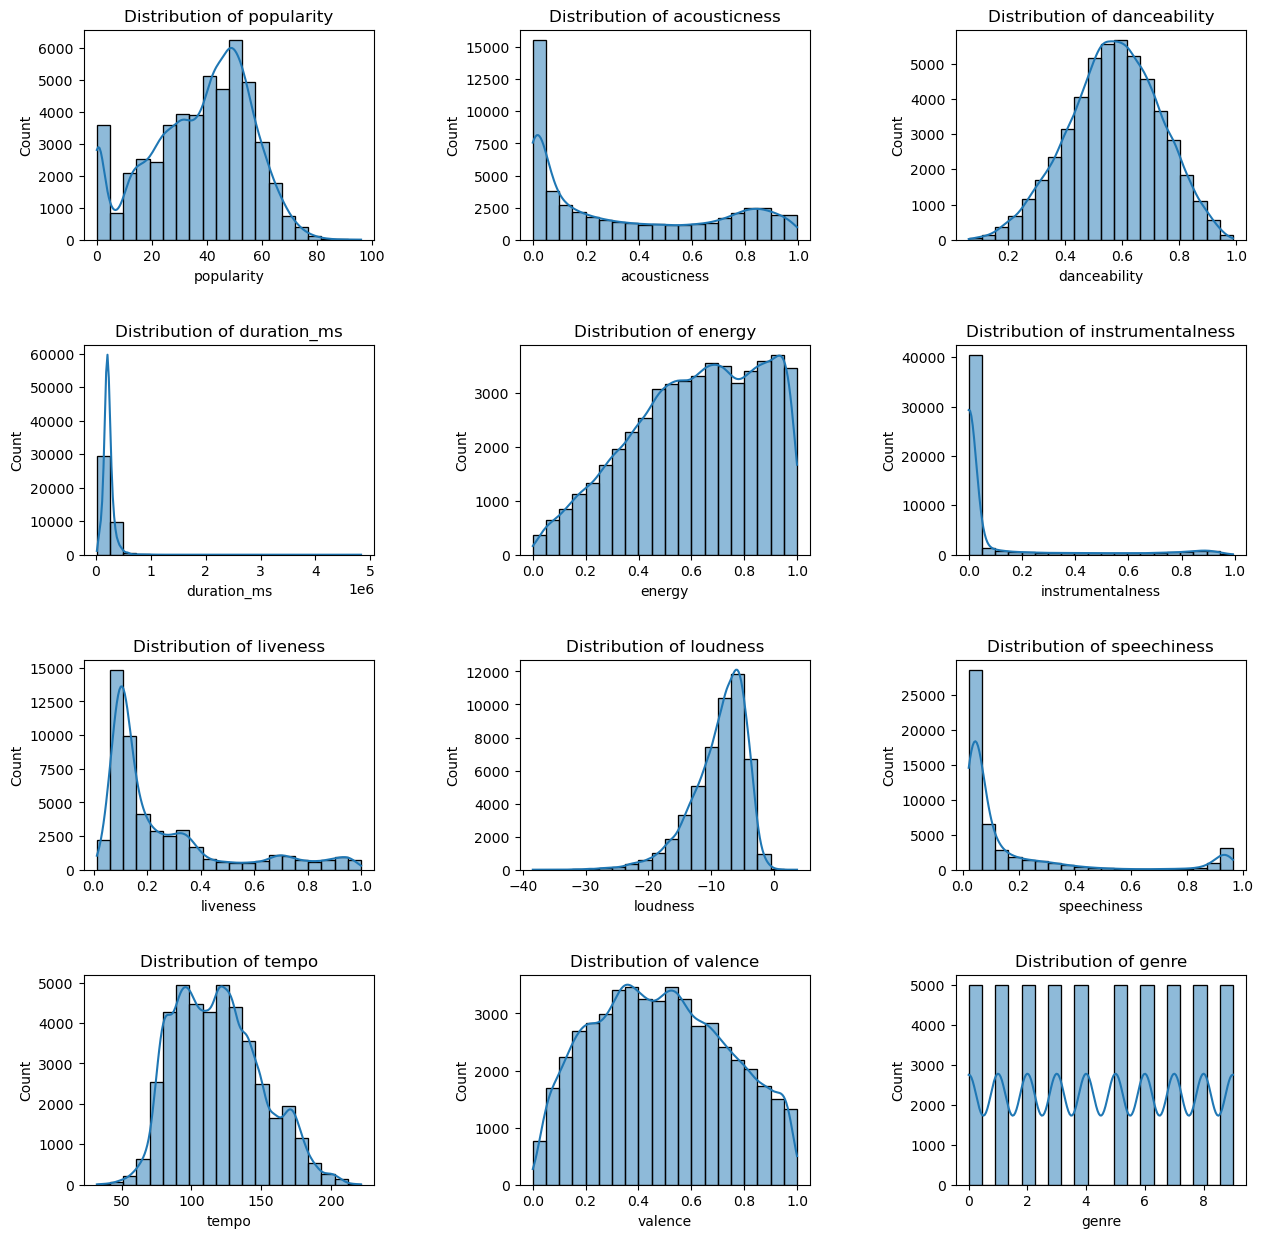

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Set the number of columns for subplots
num_cols = len(numeric_columns.columns)
num_subplot_cols = 3  # You can adjust this value based on your preference

# Calculate the number of subplot rows
num_subplot_rows = (num_cols + num_subplot_cols - 1) // num_subplot_cols

# Create subplots
fig, axes = plt.subplots(num_subplot_rows, num_subplot_cols, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Loop through numeric columns and plot distributions
for i, col in enumerate(numeric_columns.columns):
    row_idx = i // num_subplot_cols
    col_idx = i % num_subplot_cols
    ax = axes[row_idx, col_idx]
    sns.histplot(data=df, x=col, ax=ax, bins=20, kde=True)
    ax.set_title(f'Distribution of {col}')

plt.show()

In [164]:
# import numpy as np
# import statsmodels.api as sm
# from sklearn.preprocessing import PolynomialFeatures
# X = df['liveness'].values 
# y = df['genre']
# # Transform features into polynomial features
# degree = 3  
# poly_features = PolynomialFeatures(degree=degree, include_bias=False) 
# X_poly = poly_features.fit_transform(X.reshape(-1, 1))  
# # Add a constant term (intercept) to the features
# X_poly = sm.add_constant(X_poly)
# # Fit the polynomial regression model
# model = sm.OLS(y, X_poly).fit()
# # Get the p-values for each coefficient
# p_values = model.pvalues
# # Display the p-values
# print("P-values for coefficients:")
# print(p_values)


In [165]:
# X['acousticness'] = X['acousticness']**(1/2)
# X['duration_ms'] = np.log(X['duration_ms'])
# X['instrumentalness'] = X['instrumentalness']**(1/8)
# X['liveness'] =np.log(X['liveness'])
# X['loudness'] = X['loudness'] ** (1/4)
# X['speechiness'] = X['speechiness']**(1/16)

## Data Preprocessing

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
    test_size=0.2, random_state=42)

In [167]:
# import xgboost as xgb
# from sklearn.metrics import accuracy_score
# from sklearn.feature_selection import RFECV
# from sklearn.model_selection import StratifiedKFold

# # Define the XGBoost classifier with your desired parameters
# xgb_classifier = xgb.XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.2, random_state=42)

# # Create a stratified k-fold cross-validator
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Initialize the Recursive Feature Elimination with Cross-Validation (RFECV)
# rfecv = RFECV(estimator=xgb_classifier, step=1, cv=cv, scoring='accuracy')

# # Fit the RFECV to your preprocessed training data
# rfecv.fit(X_train_processed, y_train)

# # Get the selected features
# selected_features = X_train_processed.columns[rfecv.support_]

# # Transform your data to include only the selected features
# X_train_selected = X_train_processed[selected_features]
# X_test_selected = X_test_processed[selected_features]

# # Fit the XGBoost model on the selected features
# xgb_classifier.fit(X_train_selected, y_train)

# # Make predictions
# y_pred_xgb = xgb_classifier.predict(X_test_selected)

# # Evaluate the model's performance
# accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
# print(f"XGBoost Accuracy with Selected Features: {accuracy_xgb:.4f}")

In [168]:
# # Get feature importances
# feature_importances = xgb_classifier.feature_importances_

# # Get the names of the features
# feature_names = X_train_processed.columns

# # Sort feature importances in descending order
# sorted_idx = feature_importances.argsort()[::-1]

# # Plot the feature importances
# plt.figure(figsize=(10, 6))
# plt.title("XGBoost Feature Importances")
# plt.bar(range(X_train_selected.shape[1]), feature_importances[sorted_idx], align="center")
# plt.xticks(range(X_train_selected.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
# plt.xlabel("Feature")
# plt.ylabel("Feature Importance")
# plt.show()

In [189]:
categorical_features_label = ['artist_name']
numerical_features = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 
                      'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence','tempo']
categorical_features_onehot =['mode','time_signature','key']

In [190]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

In [191]:
from sklearn.base import BaseEstimator, TransformerMixin

class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, handle_unknown='use_encoded_value', unknown_value=np.nan):
        self.columns = columns
        self.imputer = SimpleImputer(strategy='constant', fill_value='missing')
        self.handle_unknown = handle_unknown
        self.unknown_value = unknown_value

    def fit(self, X, y=None):
        if self.columns is None:
            self.columns = X.columns
        
        self.imputer.fit(X[self.columns])
        self.label_mappings = {}
        
        for column in self.columns:
            unique_values = np.unique(X[column].dropna())
            if self.handle_unknown == 'use_encoded_value':
                self.label_mappings[column] = {value: i for i, value in enumerate(unique_values)}
            else:
                self.label_mappings[column] = {value: i for i, value in enumerate(unique_values, start=1)}
        
        return self

    def transform(self, X):
        X_encoded = X.copy()
        
        # Impute missing values in the specified columns
        X_encoded[self.columns] = self.imputer.transform(X[self.columns])
        
        for column in self.columns:
            X_encoded[column] = X_encoded[column].map(self.label_mappings[column])
            if self.handle_unknown == 'use_encoded_value':
                X_encoded[column] = X_encoded[column].fillna(len(self.label_mappings[column]))
            else:
                X_encoded[column] = X_encoded[column].fillna(0)
        
        return X_encoded

In [192]:
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Replace missing values with mean
    ('scaler', StandardScaler())  
])

categorical_onehot_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

categorical_label_pipeline = Pipeline([
    ('label', MultiColumnLabelEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan))
])

# Create a column transformer to apply different pipelines to different feature sets
preprocessor = ColumnTransformer([

    ('categorical_onehot', categorical_onehot_pipeline, categorical_features_onehot),
    ('categorical_label', categorical_label_pipeline, categorical_features_label),
    ('numerical', numeric_pipeline, numerical_features)

])

# Create a pipeline with the preprocessor
pipeline = Pipeline([
    ('preprocessor', preprocessor)])

In [193]:

   
# Transform the data using the preprocessor
X_train_preprocessed = pipeline.fit_transform(X_train)

# Get the column names after preprocessing for categorical one-hot
categorical_onehot_columns = preprocessor.named_transformers_['categorical_onehot']['onehot'].get_feature_names_out(categorical_features_onehot)

# Combine all column names
preprocessed_columns =  list(categorical_onehot_columns) + categorical_features_label + numerical_features

X_train_processed = pd.DataFrame(X_train_preprocessed, columns=preprocessed_columns)

In [194]:
# Transform the data using the preprocessor
X_valid_preprocessed = pipeline.transform(X_valid)

# Combine all column names
preprocessed_columns =  list(categorical_onehot_columns) + categorical_features_label + numerical_features

X_valid_processed = pd.DataFrame(X_valid_preprocessed, columns=preprocessed_columns)

## Model Fitting

In [175]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

# # Apply PCA to reduce dimensionality
# pca = PCA(n_components=0.95)
# X_train_pca = pca.fit_transform(X_train_processed)
# X_valid_pca = pca.transform(X_valid_processed)

# # Define hyperparameter grids for Random Forest and XGBoost
# param_grid = {
#     "Random Forest": {
#     'n_estimators': [10, 50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'max_features': ['auto', 'sqrt', 'log2']
#     },
#     "XGBoost": {
#         "n_estimators": [50, 100, 200],
#         "max_depth": [3, 4, 5],
#         "learning_rate": [0.01, 0.1, 0.2],
#     },
# }

# # # Initialize an empty dictionary to store the best classifiers
# best_classifiers = {}

# # Grid search for Random Forest
# rf_classifier = RandomForestClassifier()
# rf_grid_search = GridSearchCV(rf_classifier, param_grid["Random Forest"], scoring="accuracy", n_jobs=-1)
# rf_grid_search.fit(X_train_pca, y_train)
# best_rf_classifier = rf_grid_search.best_estimator_
# best_rf_classifier.fit(X_train_pca, y_train)
# y_pred_rf = best_rf_classifier.predict(X_valid_pca)
# accuracy_rf = accuracy_score(y_valid, y_pred_rf)
# best_classifiers["Random Forest"] = (best_rf_classifier, accuracy_rf)

# # Grid search for XGBoost
# xgb_classifier = xgb.XGBClassifier(objective="multi:softmax", num_class=len(set(y)), random_state=42)
# xgb_grid_search = GridSearchCV(xgb_classifier, param_grid["XGBoost"], scoring="accuracy", n_jobs=-1)
# xgb_grid_search.fit(X_train_processed, y_train)
# best_xgb_classifier = xgb_grid_search.best_estimator_
# best_xgb_classifier.fit(X_train_processed, y_train)
# y_pred_xgb = best_xgb_classifier.predict(X_valid_processed)
# accuracy_xgb = accuracy_score(y_valid, y_pred_xgb)
# best_classifiers["XGBoost"] = (best_xgb_classifier, accuracy_xgb)

# # Print the best classifiers and their corresponding accuracy scores
# for name, (best_classifier, accuracy) in best_classifiers.items():
#     print(f"Best {name}:")
#     print(best_classifier)
#     print(f"Accuracy: {accuracy:.2f}\n")


In [176]:
# Create a Random Forest classifier with default parameters
rf_classifier = RandomForestClassifier(max_depth = 10, max_features='sqrt', min_samples_split=10,
                       n_estimators=200, random_state=42)

# Fit the Random Forest model on the training data
rf_classifier.fit(X_train_processed, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_valid_processed)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6159


In [177]:
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import cross_val_score

# # Convert the Pandas DataFrame to a NumPy array
# X_train_array = X_train_processed.values

# # Create a Random Forest classifier with custom parameters
# rf_classifier = RandomForestClassifier(
#     max_depth=10,
#     max_features='sqrt',
#     min_samples_split=10,
#     n_estimators=200,
#     random_state=42
# )

# # Fit the Random Forest classifier to the training data
# rf_classifier.fit(X_train_array, y_train)

# # Perform cross-validation with different feature subsets and record accuracies
# feature_accuracies = []

# for num_features in range(1, X_train_array.shape[1] + 1):
#     # Select the top num_features based on feature importances
#     top_n_features = np.argsort(rf_classifier.feature_importances_)[::-1][:num_features]
    
#     # Use the selected features for modeling
#     X_train_selected = X_train_array[:, top_n_features]
    
#     # Perform cross-validation and calculate mean accuracy
#     cv_accuracy = cross_val_score(rf_classifier, X_train_selected, y_train, cv=5, scoring='accuracy').mean()
    
#     feature_accuracies.append((num_features, cv_accuracy))

# # Find the number of features that maximize accuracy
# best_num_features, best_accuracy = max(feature_accuracies, key=lambda x: x[1])

# # Use the best number of features to select the top features
# top_n_features = np.argsort(rf_classifier.feature_importances_)[::-1][:best_num_features]
# X_train_selected = X_train_array[:, top_n_features]
# X_test_selected = X_test_processed.values[:, top_n_features]

# # Train the Random Forest model on the selected features
# rf_classifier_selected = RandomForestClassifier(
#     max_depth=10,
#     max_features='sqrt',
#     min_samples_split=10,
#     n_estimators=200,
#     random_state=42
# )

# rf_classifier_selected.fit(X_train_selected, y_train)

# # Make predictions on the test data using the model with selected features
# y_pred = rf_classifier_selected.predict(X_test_selected)

# # Calculate and print the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Random Forest Accuracy: {accuracy:.2f}")


In [178]:
# y_pred_df.to_csv("y_test.csv")

In [179]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Create an XGBoost classifier with default parameters
xgb_classifier = xgb.XGBClassifier(n_estimators= 200, max_depth=6,
learning_rate= 0.2,random_state=42)

# Fit the XGBoost model to your training data
xgb_classifier.fit(X_train_processed, y_train)

# Make predictions
y_pred_xgb = xgb_classifier.predict(X_valid_processed)

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_valid, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")


XGBoost Accuracy: 0.6799


In [180]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.ensemble import StackingClassifier

# rf_model = RandomForestClassifier(max_depth = 10, max_features='sqrt', min_samples_split=10,
#                        n_estimators=200, random_state=42)
# xgb_model = XGBClassifier(n_estimators= 200, max_depth=6,
# learning_rate= 0.2,random_state=42)

# # Define the meta-model (Logistic Regression is used here, but you can choose a different one)
# meta_model = LogisticRegression()

# # Create the stacking ensemble
# stacking_model = StackingClassifier(
#     estimators=[('rf', rf_model), ('xgb', xgb_model)],
#     final_estimator=meta_model
#     )

# # Fit the stacking model to the training data
# stacking_model.fit(X_train_processed, y_train)

# # Make predictions on the test data
# y_pred = stacking_model.predict(X_valid_processed)

# # Evaluate the model
# accuracy = accuracy_score(y_valid, y_pred)
# print(f"Accuracy of the stacking model: {accuracy:.4f}")

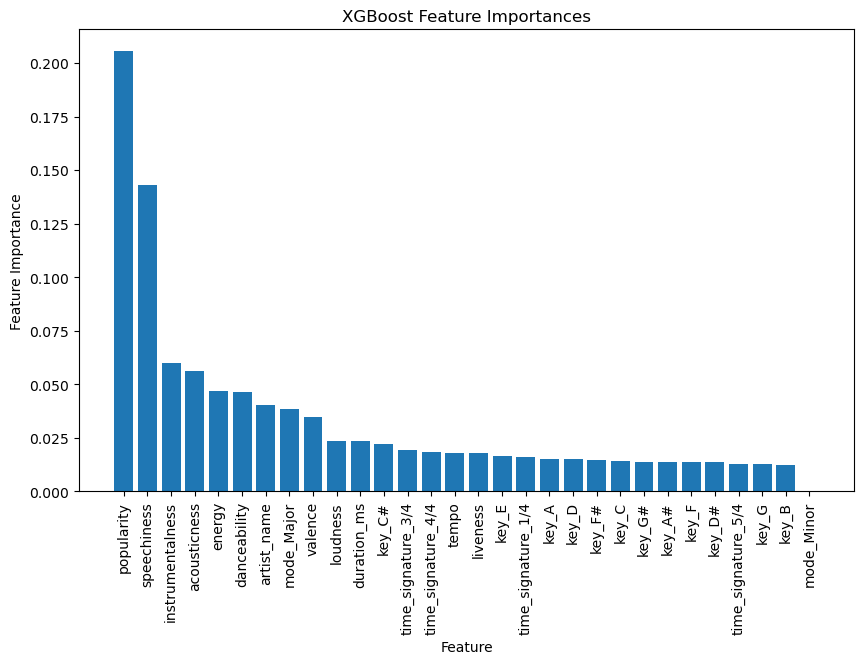

In [181]:
# Get feature importances
feature_importances = xgb_classifier.feature_importances_

# Get the names of the features
feature_names = X_train_processed.columns

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importances")
plt.bar(range(X_train_processed.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X_train_processed.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()

In [182]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

# # Define hyperparameter grids for XGBoost
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 4, 5, 6],
#     'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
# }

# # Create an XGBoost classifier
# xgb_classifier = xgb.XGBClassifier(random_state=42)

# # Create a GridSearchCV instance with cross-validation
# grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# # Fit the GridSearchCV to your training data
# grid_search.fit(X_train_processed, y_train)

# # Get the best XGBoost classifier from the grid search
# best_xgb_classifier = grid_search.best_estimator_

# # Make predictions on the test data using the best classifier
# y_pred_xgb = best_xgb_classifier.predict(X_test_processed)

# # Calculate and print the accuracy of the best model
# accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
# print(f"XGBoost Accuracy (with CV): {accuracy_xgb:.2f}")

# # Print the best hyperparameters
# print("Best Hyperparameters:")
# print(grid_search.best_params_)

## The test set

#### Fit transform the whole training set

In [195]:
# Transform the data using the preprocessor
X_preprocessed = pipeline.fit_transform(X)

# Combine all column names
preprocessed_columns =  list(categorical_onehot_columns) + categorical_features_label + numerical_features

X_processed = pd.DataFrame(X_preprocessed, columns=preprocessed_columns)

In [184]:
# X_test_real['acousticness'] = X_test_real['acousticness']**(1/2)
# X_test_real['duration_ms'] = np.log(X_test_real['duration_ms'])
# X_test_real['instrumentalness'] =X['instrumentalness']**(1/4)
# X_test_real['liveness'] =np.log(X_test_real['liveness'])
# # X_test_real['loudness'] = np.log(X_test_real['loudness']**2)
# X_test_real['speechiness'] = X_test_real['speechiness']**(1/8)

# X_test_real['energy_loudness'] = X_test_real['energy'] * X_test_real['loudness']
# X_test_real['liveness_speechiness'] = X_test_real['liveness'] * X_test_real['speechiness']
# X_test_real['energy_acousticness'] = X_test_real['energy'] * X_test_real['acousticness']
# X_test_real['loudness_acousticness'] = X_test_real['loudness'] * X_test_real['acousticness']


#### Transform the test set

In [196]:
X_test_real['tempo'] = X_test_real['tempo'].replace('?', np.nan)
X_test_real['tempo'] = X_test_real['tempo'].astype('float64')

# Transform the data using the preprocessor
X_test_repo = pipeline.transform(X_test_real)

# Combine all column names
preprocessed_columns =  list(categorical_onehot_columns) + categorical_features_label + numerical_features

X_test_repo = pd.DataFrame(X_test_repo, columns=preprocessed_columns)

In [186]:
# X_processed = X_processed[['mode_Major', 'artist_name', 'popularity', 'acousticness',
#        'danceability', 'energy', 'instrumentalness', 'speechiness', 'valence']] 
# X_test_processed = X_test_repo[['mode_Major', 'artist_name', 'popularity', 'acousticness',
#        'danceability', 'energy', 'instrumentalness', 'speechiness', 'valence']]

#### Fitting the models

#### Random forest

In [197]:
# Create a Random Forest classifier with default parameters
rf_classifier = RandomForestClassifier(max_depth = 10, max_features='sqrt', min_samples_split=10,
                       n_estimators=200, random_state=42)

# Fit the Random Forest model on the training data
rf_classifier.fit(X_processed, y)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test_repo)

In [198]:
y_pred_rf = label_encoder.inverse_transform(y_pred_rf)

In [199]:
y_pred_df = pd.DataFrame({'instance_id': range(1, len(y_pred_rf) + 1), 'genre': y_pred_rf})
y_pred_df.to_csv("y_test_rf.csv", index = False)

#### XGBoost

In [200]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Create an XGBoost classifier with default parameters
xgb_classifier = xgb.XGBClassifier(n_estimators= 200, max_depth=6,
learning_rate= 0.2,random_state=42)

# Fit the XGBoost model to your training data
xgb_classifier.fit(X_processed, y)

# Make predictions
y_pred_xgb = xgb_classifier.predict(X_test_repo)

In [201]:
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb)

In [202]:
y_pred_df = pd.DataFrame({'instance_id': range(1, len(y_pred_xgb) + 1), 'genre': y_pred_xgb})
y_pred_df.to_csv("y_test_xgb.csv", index = False)

## Result on Kaggle

In this attempt, the accuracy of the XGB model is still 0.69674 and surprisingly, the top 9 with highest importance score in the initial model is also the best subset with highest accuracy using RFE cross validation. Therefore, I decided to select this model as my final system to predict the music genres